# Global Chinese Development Finance Dataset

Global China Data [AidData's Global Chinese Development Finance Dataset, Version 3.0](https://www.aiddata.org/data/aiddatas-global-chinese-development-finance-dataset-version-3-0)

In [1]:
import pandas
import geopandas
import geodatasets
import matplotlib.pyplot
import urllib.parse

Load the data. This version doesn't have geospatial data included.

In [2]:
path = "../data/AidDatas_Global_Chinese_Development_Finance_Dataset_Version_3_0/AidDatasGlobalChineseDevelopmentFinanceDataset_v3.0.xlsx"
data = pandas.read_excel(path, sheet_name="GCDF_3.0", index_col="AidData Record ID")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20985 entries, 94556 to 73615
Columns: 125 entries, Recommended For Aggregates to Loan Detail Score
dtypes: datetime64[ns](7), float64(24), int64(6), object(88)
memory usage: 20.2+ MB


# Geospatial analysis

Take a look at the geographical information

In [3]:
data[["Recipient", "Recipient Region", "Location Narrative", "Geographic Level of Precision Available",
    "ADM1 Level Available", "ADM2 Level Available", "Geospatial Feature Available"]].sample(10)

,Recipient,Recipient Region,Location Narrative,Geographic Level of Precision Available,ADM1 Level Available,ADM2 Level Available,Geospatial Feature Available
AidData Record ID,,,,,,,
58110,Malawi,Africa,More detailed locational information can be fo...,Precise,Yes,Yes,Yes
52224,Guinea,Africa,This project involved the construction of a 43...,NaN,NaN,NaN,NaN
1266,Namibia,Africa,NaN,NaN,NaN,NaN,NaN
54781,Argentina,America,NaN,NaN,NaN,NaN,NaN
65642,Lebanon,Middle East,This project took place in the Nahr al-Bared (...,Precise,Yes,Yes,Yes
47193,Sudan,Africa,Friendship Hall is located in the center of Kh...,Precise,Yes,Yes,Yes
61116,Madagascar,Africa,Ivato International Airport located 16 km nort...,NaN,NaN,NaN,NaN
73804,Fiji,Oceania,NaN,NaN,NaN,NaN,NaN
85305,Democratic Republic of the Congo,Africa,NaN,NaN,NaN,NaN,NaN


(0.0, 20985.0)

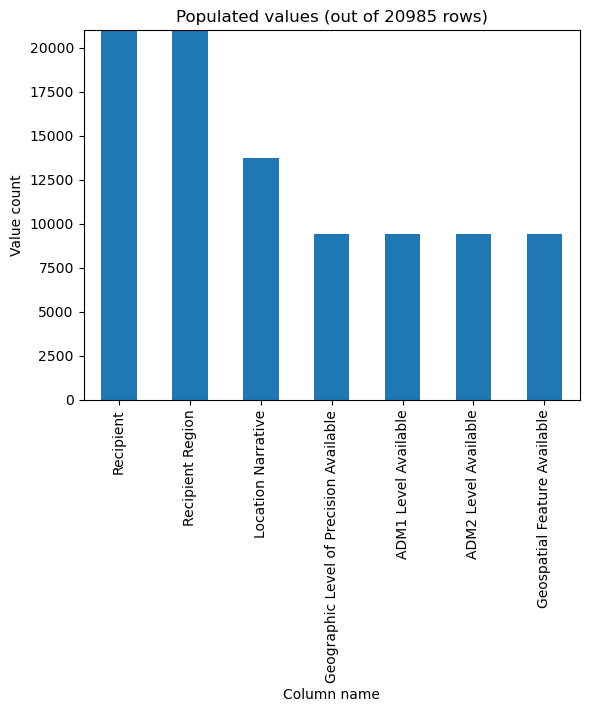

In [4]:
row_count = len(data.index)
series = data[["Recipient", "Recipient Region", "Location Narrative", "Geographic Level of Precision Available",
    "ADM1 Level Available", "ADM2 Level Available", "Geospatial Feature Available"]].notnull().sum()
axes = series.plot.bar()
axes.set_title(f"Populated values (out of {row_count} rows)")
axes.set_xlabel("Column name")
axes.set_ylabel("Value count")
axes.set_ylim([0, row_count])

55.2% missing values


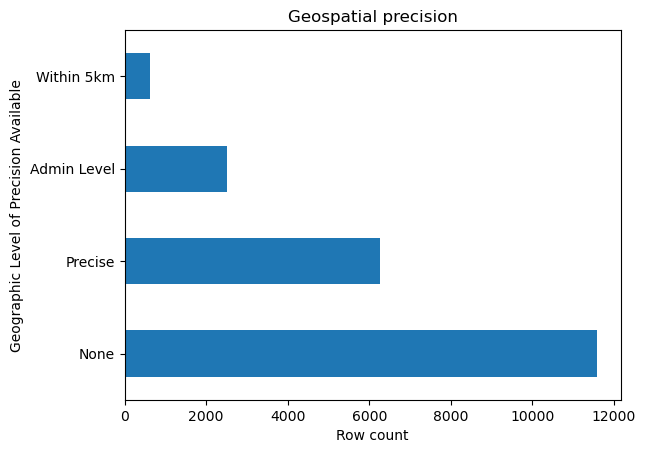

In [5]:
series = data["Geographic Level of Precision Available"].fillna("None").value_counts()
axes = series.plot.barh()
axes.set_title("Geospatial precision")
axes.set_xlabel("Row count")
print(round(series["None"] / series.sum(), 3) * 100, "% missing values", sep="")

Text(0.5, 0, 'Project count')

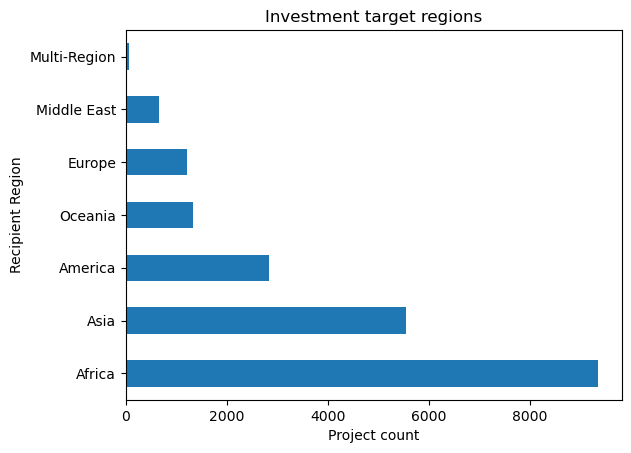

In [6]:
axes = data["Recipient Region"].value_counts().plot.barh(title="Investment target regions")
axes.set_xlabel("Project count")

Text(0.5, 0, 'Project count')

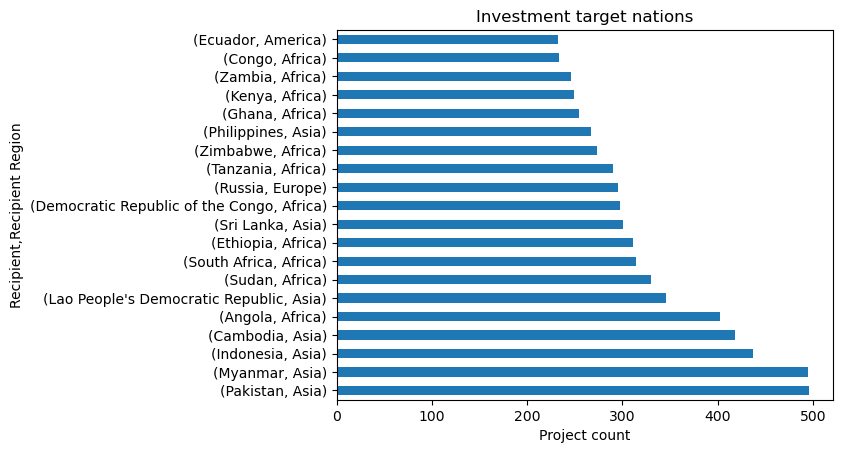

In [7]:
axes = data[["Recipient", "Recipient Region"]].value_counts().head(20).plot.barh(title="Investment target nations")
axes.set_xlabel("Project count")

Get shapefiles for country boundaries:

Natural Earth [1:110m Cultural Vectors](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)

In [11]:
countries = geopandas.read_file("../shapefiles/ne_110m_admin_0_countries.shp")
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


In [12]:
geodata = geopandas.GeoDataFrame(data["Recipient"].value_counts().drop("Multi-Region").to_frame().join(countries.set_index("ADMIN")["geometry"], how="outer"))
geodata["count"] = geodata["count"].fillna(0)
geodata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 220 entries, Afghanistan to eSwatini
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   count     220 non-null    float64 
 1   geometry  177 non-null    geometry
dtypes: float64(1), geometry(1)
memory usage: 5.2+ KB


Text(35.347222222222214, 0.5, 'Latitude')

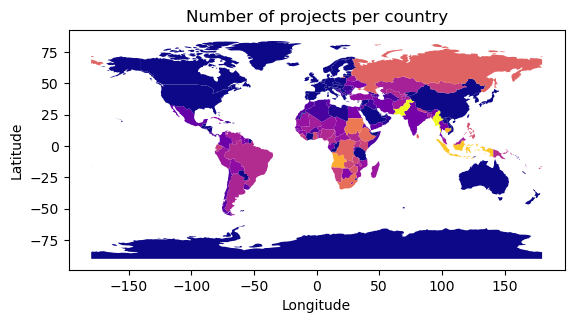

In [13]:
fig, ax = matplotlib.pyplot.subplots()
geodata.plot(column="count", cmap="plasma", ax=ax)
ax.set_title("Number of projects per country")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Geospatial Global Chinese Development Finance Dataset

[AidData's Geospatial Global Chinese Development Finance (GCDF) Dataset, Version 3.0](https://www.aiddata.org/data/aiddatas-geospatial-global-chinese-development-finance-dataset-version-3-0)

This version includes
> geospatial features defining the location of Chinese financed projects, and expands the type of analysis which can be conducted using the tabular, project level data from AidData's Global Chinese Development Finance Dataset

In [14]:
path = "../data/OSM_Polygon.gpkg"
gcdf = geopandas.read_file(path).set_index("index")
gcdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 9214 entries, 0 to 13905
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             9214 non-null   int64   
 1   osm_link       9214 non-null   object  
 2   osm_precision  9214 non-null   object  
 3   geometry       9214 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 359.9+ KB


The Open Street Map link field is 100% populated

In [15]:
gcdf.osm_link.str.strip().replace("", pandas.NA).isnull().value_counts()

osm_link
False    9214
Name: count, dtype: int64

Summary of domains linked to

In [16]:
gcdf.osm_link.map(lambda s: urllib.parse.urlsplit(s).netloc).value_counts()

osm_link
www.openstreetmap.org    9194
                           12
openstreetmap.org           8
Name: count, dtype: int64

In [17]:
gcdf[gcdf.id.duplicated()].sort_values("id")

,id,osm_link,osm_precision,geometry
index,,,,
8,29,https://www.openstreetmap.org/way/604970193,precise,"POLYGON ((25.92319 -24.65636, 25.92318 -24.657..."
13,38,https://www.openstreetmap.org/way/244641271#ma...,precise,"POLYGON ((23.43502 -20.03557, 23.43642 -20.035..."
25,63,https://www.openstreetmap.org/relation/1802548,adm4,"POLYGON ((18.4559 -10.38735, 18.45569 -10.3866..."
24,63,https://www.openstreetmap.org/relation/1802547,adm4,"POLYGON ((17.28737 -9.33527, 17.28737 -9.33527..."
23,63,https://www.openstreetmap.org/relation/568485,adm4,"POLYGON ((16.47893 -14.17066, 16.47893 -14.170..."
...,...,...,...,...
13818,97284,https://www.openstreetmap.org/way/200480762,precise,"POLYGON ((-78.69277 26.53212, -78.6928 26.5321..."
13849,97400,https://www.openstreetmap.org/relation/318864,adm4,"POLYGON ((27.77845 -15.30519, 27.77845 -15.305..."
13850,97400,https://www.openstreetmap.org/relation/10685903,adm5,"POLYGON ((28.31023 -12.90687, 28.31023 -12.906..."


[OpenStreetMap precision](https://wiki.openstreetmap.org/wiki/Precision_of_coordinates)

In [18]:
gcdf.sample(10)

,id,osm_link,osm_precision,geometry
index,,,,
5543,57403,https://www.openstreetmap.org/way/374475347,precise,"POLYGON ((-16.47627 13.21773, -16.47693 13.217..."
9129,68171,https://www.openstreetmap.org/way/152850624,precise,"POLYGON ((51.43454 35.75259, 51.43459 35.75248..."
8729,66943,https://www.openstreetmap.org/way/229819518,precise,"POLYGON ((58.16827 38.06, 58.16774 38.05841, 5..."
10849,85643,https://www.openstreetmap.org/way/353240916,precise,"POLYGON ((43.13373 11.58242, 43.13549 11.58224..."
9,31,https://www.openstreetmap.org/relation/270332,adm6,"POLYGON ((25.60724 -25.22314, 25.60724 -25.223..."
11682,88707,https://www.openstreetmap.org/relation/5831765,adm6,"POLYGON ((106.18119 14.82202, 106.18241 14.825..."
1700,34788,https://www.openstreetmap.org/way/169927341#ma...,adm8,"POLYGON ((14.98515 -10.74239, 14.98666 -10.742..."
3877,48911,https://www.openstreetmap.org/relation/2301441,adm4,"POLYGON ((105.61222 10.97468, 105.61221 10.974..."
13302,95724,https://www.openstreetmap.org/relation/2750010,precise,"POLYGON ((51.36522 35.52725, 51.36527 35.52681..."


In [21]:
gcdf.loc[3877]

id                                                           48911
osm_link            https://www.openstreetmap.org/relation/2301441
osm_precision                                                 adm4
geometry         POLYGON ((105.61221501290667 10.97467584466120...
Name: 3877, dtype: object

In [19]:
gcdf.id.nunique()

6945

In [20]:
for key, value in data.loc[97773].items():
    print(key, value)

Recommended For Aggregates Yes
AidData Parent ID nan
Umbrella No
Financier Country China (People's Republic of)
Recipient South Africa
Recipient ISO-3 ZAF
Recipient Region Africa
Commitment Year 2016
Implementation Start Year nan
Completion Year nan
Title Bank of China contributes to $965 million syndicated ‘B’ loan for Eskom Power Generation and Transmission Project
Description On July 6, 2016, Eskom Holdings SOC Ltd (‘Eskom’) — a 100% South African state-owned power utility — signed a A-loan agreement (worth ZAR 5.3 billion) with the African Development Bank (AfDB) and a B-loan agreement (worth $965 million) with a syndicate of banks (including AFDB, Bank of China, Bank of Tokyo-Mitsubishi, CaixaBank, Citibank, HSBC, JP Morgan Chase, KfW IPEX Bank, Siemens Bank and Standard Chartered) for the Eskom Power Generation and Transmission Project. The A-loan, which is not backed by a sovereign guarantee, carried an 18-year maturity. The B-loan, which is backed by a sovereign guaranteed, car